# Банки — Анализ оттока клиентов

# Задача

Проанализировать клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка.

- Провевести исследовательский анализ данных,
- Выделить портреты клиентов, которые склонны уходить из банка,
- Сформулировать и проверить статистические гипотезы.

# Описание датасета

- userid — идентификатор пользователя,
- score — баллы кредитного скоринга,
- City — город,
- Gender — пол,
- Age — возраст,
- Objects — количество объектов в собственности,
- Balance — баланс на счёте,
- Products — количество продуктов, которыми пользуется клиент,
- CreditCard — есть ли кредитная карта,
- Loyalty — активный клиент,
- estimated_salary — заработная плата клиента,
- Churn — ушёл или нет.

**Дашборд (набор 1) :** https://public.tableau.com/app/profile/vlad7274/viz/_16499550781100/Dashboard1

**Презентация:** https://www.dropbox.com/s/25o514i1mnsum48/%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%BE%D1%82%D1%82%D0%BE%D0%BA%D0%B0%20%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2%20%D0%B8%D0%B7%20%D0%B1%D0%B0%D0%BD%D0%BA%D0%B0.pdf?dl=0

# Оглавление

[**1 Знакомство с данными**](#part1)
- 1.1 импорт библиотек
- 1.2 чтение данных и загрузка в датафрейм
- 1.3 выводим общие сведения о данных

[**2 Предобработка данных**](#part2)
- 2.1 проверка и замена типов данных
- 2.2 проверка на дубликаты
- 2.3 обработка пропусков
- 2.4 проверка на аномалии
- 2.5 категоризация данных

[**3 Исследовательский анализ данных**](#part3)
- 3.1 анализ средних значений признаков
- 3.2 анализ средних значений признаков тех , кто ушел в отток и тех, кто остался
- 3.3 анализ распределения признаков    тех , кто ушёл в отток и тех, кто остался
- 3.4 анализ матрицы корреляций

[**4 Выделение портрет клиентов, которые склонны уходить из банка**](#part4)

[**5 Проверка гипотез**](#part5)
- 5.1 Проверка гипотезы о различии дохода между теми клиентами, которые ушли и теми, которые остались
- 5.2 Проверка гипотеза о различии возраста между теми клиентами, которые ушли и теми, которые остались  

[**6 Выводы и рекомендации**](#part6)



<a id="part1"></a>

## Знакомство с данными

### импорт библиотек

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy import stats as st

### чтение данных и загрузка в датафрейм

In [13]:
df=pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')
pd.options.display.float_format = '{:.2f}'.format
df.head(10)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


###  выводим общие сведения о данных

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [15]:
df.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,10000.00,10000.00,10000.00,10000.00,6383.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15733676.57,650.53,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,30095.06,0.58,0.46,0.50,57510.49,0.40
min,15608437.00,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.00
25%,15671264.25,584.00,32.00,3.00,100181.98,1.00,0.00,0.00,51002.11,0.00
50%,15733474.00,652.00,37.00,5.00,119839.69,1.00,1.00,1.00,100193.91,0.00
75%,15795969.75,718.00,44.00,7.00,139512.29,2.00,1.00,1.00,149388.25,0.00
max,15858426.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


**Вывод**
- С типами данных все в порядке
- Нужно поменять регистр названия столбцов
- Пропуски только в столбце Balance
- в целом все в порядке

<a id="part2"></a>

## Предобработка данных

### проверка и замена типов данных

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


с типами данных все в порядке, ничего менять не нужно

In [17]:
#приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.head()

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


### проверка на дубликаты

In [18]:
df.duplicated().sum()

0

Дубликатов нет

###  обработка пропусков

In [19]:
df['balance'].min()

3768.69

Как видим, минимальное значение баланса не ноль, может быть как раз с этим и связана проблема с пропусками, при выгрузке данных у клиента на счету не было денег и из-за каких-то технических проблем нули отображаются пропусками. В любом случае, пропуски нужно заменить на нули, чтобы было удобней работать с данными

In [20]:
df= df.fillna(0)
df.isnull().sum()

userid              0
score               0
city                0
gender              0
age                 0
objects             0
balance             0
products            0
creditcard          0
loyalty             0
estimated_salary    0
churn               0
dtype: int64

### проверка на аномалии

In [21]:
df.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15733676.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,15608437.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,15671264.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,15733474.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,15795969.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,15858426.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


- в score аномалий нет
- в age аномалий нет
- в objects аномалий нет
- в balance аномалий нет
- в products аномалий нет
- а вот к estimated_salary есть вопросы


Минимальная зп уж слишком мала, посмотрим на значения ниже 1%

In [22]:
print(np.percentile(df['estimated_salary'], [1,5]))

[1842.8253 9851.8185]


возможно это люди, которые получают какие-то выплаты от государства или домохозяйки или кто-то указывает свои доходы неправильно

In [23]:
low_sal = df[df['estimated_salary'] < 1842]


In [24]:
low_sal.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,15725304.24,659.18,39.47,5.23,63197.24,1.54,0.72,0.50,913.65,0.19
std,71834.00,95.30,10.51,2.95,61485.43,0.50,0.45,0.50,496.72,0.39
min,15608947.00,416.00,21.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,15666536.25,594.50,33.00,3.00,0.00,1.00,0.00,0.00,542.14,0.00
50%,15720868.00,661.00,37.00,5.00,82264.65,2.00,1.00,0.50,870.13,0.00
75%,15794321.75,714.25,43.25,8.00,114612.12,2.00,1.00,1.00,1289.30,0.00
max,15855568.00,850.00,75.00,10.00,204510.94,2.00,1.00,1.00,1801.77,1.00


интересно получается, что у людей с супер низким доход в среденем во владении есть 5 объектов и на балансе 60 000 руб
нужно будет сообщить об этом коллегам и детальнее с этим разобраться, возможен опять таки какой-то технический сбой. 
Ну а в маштабах данной выборки 100 строк это незначительно, поэтому оставим все как есть

### категоризация данных

In [25]:
df.describe()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15733676.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,15608437.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,15671264.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,15733474.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,15795969.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,15858426.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [26]:
#категоризация по скорингу
def score_category(df):
    
    if df['score'] < 500:
        return 'низкий рейтинг'
    
    elif df['score'] <= 700:
        return 'средний рейтинг'
    
    else:
        return 'высокий рейтинг'

#добавим новый столбец
df['score_category'] = df.apply(score_category, axis=1)

df.head(5)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,score_category
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1,средний рейтинг
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,средний рейтинг
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,средний рейтинг
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0,средний рейтинг
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,высокий рейтинг


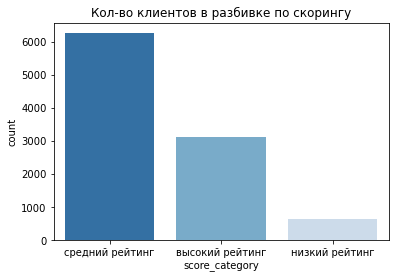

In [27]:
sns.countplot(x = 'score_category', data = df, palette = 'Blues_r')
plt.title('Кол-во клиентов в разбивке по скорингу')
plt.show()

In [28]:
#категоризация по уровню дохода
def sal_category(df):
    
    if df['estimated_salary'] <= 55000:
        return 'низкий доход'
    
    elif df['estimated_salary'] <= 100000:
        return 'средний доход'
    
    else:
        return 'высокий доход'

#добавим новый столбец
df['salary_category'] = df.apply(sal_category, axis=1)

df.head(5)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,score_category,salary_category
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1,средний рейтинг,высокий доход
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,средний рейтинг,высокий доход
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,средний рейтинг,высокий доход
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0,средний рейтинг,средний доход
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,высокий рейтинг,средний доход


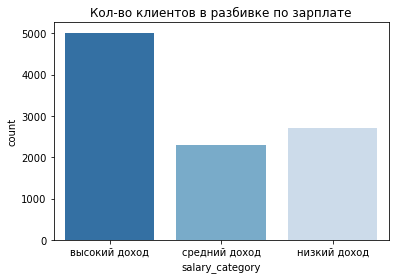

In [29]:
sns.countplot(x = 'salary_category', data = df, palette = 'Blues_r')
plt.title('Кол-во клиентов в разбивке по зарплате')
plt.show()

In [30]:
#категоризация по возрасту
def age_category(df):
    
    if df['age'] <= 35:
        return 'молодого возраста'
    
    elif df['age'] <= 60:
        return 'среднего возраста'
    
    else:
        return 'пенсионного возраста'

#добавим новый столбец 
df['age_category'] = df.apply(age_category, axis=1)

df.sample(5)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,score_category,salary_category,age_category
1606,15756816,566,Ростов Великий,Ж,40,2,97001.36,2,1,0,154486.01,0,средний рейтинг,высокий доход,среднего возраста
7702,15762667,850,Ярославль,М,31,8,0.00,2,1,0,178667.70,0,высокий рейтинг,высокий доход,молодого возраста
923,15643762,572,Ростов Великий,Ж,19,1,138657.08,1,1,1,16161.82,0,средний рейтинг,низкий доход,молодого возраста
9529,15704444,508,Ярославль,Ж,41,5,0.00,2,1,1,94170.84,0,средний рейтинг,средний доход,среднего возраста
4118,15825047,529,Ярославль,М,28,9,0.00,2,1,1,52545.24,0,средний рейтинг,низкий доход,молодого возраста


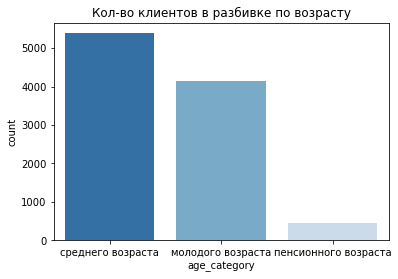

In [31]:
sns.countplot(x = 'age_category', data = df, palette = 'Blues_r')
plt.title('Кол-во клиентов в разбивке по возрасту')
plt.show()

In [32]:
#категоризация по числу объектов в собстенности
def objects_category(df):
    
    if df['objects'] == 0:
        return 'нет объектов'
    
    elif df['objects'] < 3:
        return '1-2 объекта'
    
    elif df['objects'] <= 5:
        return '3-5 объектов'
    
    else:
        return 'боле 5 объектов'

#добавим новый столбец в таблицу
df['objects_category'] = df.apply(objects_category, axis=1)

df.sample(5)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,score_category,salary_category,age_category,objects_category
40,15662096,472,Рыбинск,М,40,4,0.00,1,1,0,70154.22,0,низкий рейтинг,средний доход,среднего возраста,3-5 объектов
9865,15734686,591,Ярославль,М,49,3,0.00,2,1,0,50123.44,0,средний рейтинг,низкий доход,среднего возраста,3-5 объектов
8905,15704481,557,Ярославль,М,36,3,0.00,1,0,1,144078.02,0,средний рейтинг,высокий доход,среднего возраста,3-5 объектов
5850,15804827,631,Ростов Великий,Ж,22,6,139129.92,1,1,1,63747.51,0,средний рейтинг,средний доход,молодого возраста,боле 5 объектов
9773,15741198,532,Ярославль,М,36,4,0.00,2,1,1,132798.78,0,средний рейтинг,высокий доход,среднего возраста,3-5 объектов


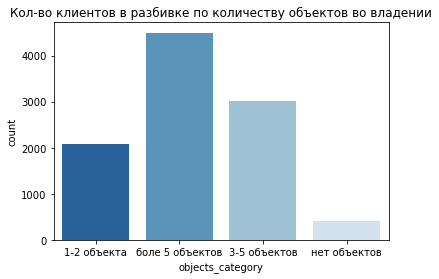

In [33]:
sns.countplot(x = 'objects_category', data = df, palette = 'Blues_r')
plt.title('Кол-во клиентов в разбивке по количеству объектов во владении')
plt.show()

преобладают клиенты среднего возраста, с высоким достатком, у которых во владении более 5 объектов и средний уровень банковского скоринга

<a id="part3"></a>
## Исследовательский анализ данных

### анализ средних значений признаков

In [34]:
###заменим пол на единицы и нули, чтобы посмотреть статистику пo полу
df2 = df.copy()
df2['gender'] = df2['gender'].replace({'Ж':0, 'М': 1})

In [35]:
df2.describe()

,userid,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15733676.57,650.53,0.55,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,0.50,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,15608437.00,350.00,0.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,15671264.25,584.00,0.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,15733474.00,652.00,1.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,15795969.75,718.00,1.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,15858426.00,850.00,1.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


- кредитный скоринг равный в среднем 650 баллов, в целом стабильные клиенты, с таким баллом можно получить займ
- мужчин и женщин поровну
- клиентам от 18 до 92 лет, в среднем клиенту около 40 лет
- в среднем у клиентов в собственности 5 объектов
- в среднем(по медиане) на балансе у клиентов около 100 000 
- в среднем клиенты пользуются 1-2 продуктами
- у большинства есть кредитная карта
- в среднем зп равняется 100 000
- в этой выборке 20% клиентов ушли в отток

### анализ средних значений признаков тех , кто ушел в отток и тех, кто остался

In [36]:
df2.groupby('churn').agg('mean').T

churn,0,1
userid,15733903.88,15732787.96
score,651.85,645.35
gender,0.57,0.44
age,37.41,44.84
objects,5.03,4.93
balance,72745.30,91108.54
products,1.54,1.48
creditcard,0.71,0.70
loyalty,0.55,0.36
estimated_salary,99738.39,101465.68


В целом те, кто ушел в отток, не особо отличаются от тех, кто остался.
Стоит только выделить,что в оттоке:
- у клиентов выше возраст
- количество денег на балансе больше
- чаще бывают клиенты, не являющиеся активными 

### анализ распределения признаков тех , кто ушёл в отток и тех, кто остался

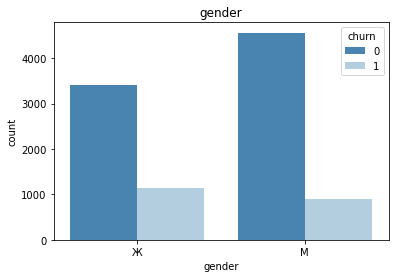

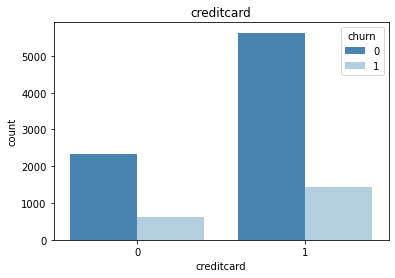

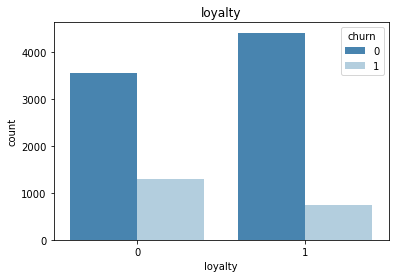

In [37]:
###Построим countplot-графики для бинарных признаков
for column in ['gender', 'creditcard', 'loyalty']:
    sns.countplot(x = df[column], hue='churn', data=df,palette = 'Blues_r')
    plt.title(column)
    plt.show()

В отток уходит чуть больше женщин чем мужчин, те, у кого есть кредитка и те, которые неактивные

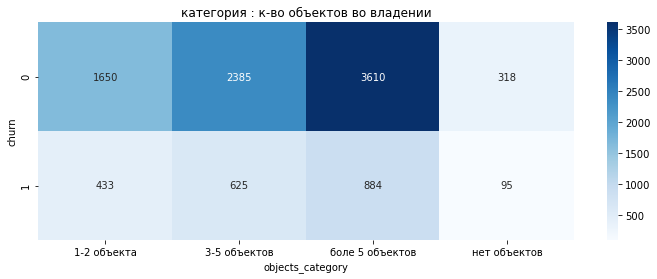

In [38]:
###построим тепловые карты для небинарных признаков
obj = df.pivot_table(index='churn',columns='objects_category',values='userid',aggfunc='count')
plt.figure(figsize=(12, 4))
sns.heatmap(obj, cmap='Blues', annot=True, fmt='.0f')
plt.title('категория : к-во объектов во владении')
plt.show()

Больше всего в отток уходят клиенты у которых в собственности более 5 объектов, но это логично, потому что в данной выборке таких клиентов большинство. Поэтому напишем функцию, которая будет считать % оттока из категории

In [39]:
def churn_from_category(piv):
    piv= piv.reset_index()
    for i in piv.columns:
        print('% оттока от категории',i,': {:.2%}'.format(float(piv[piv['churn'] == 1][i]/piv[i].sum())))

In [40]:
churn_from_category(obj)

% оттока от категории churn : 100.00%
% оттока от категории 1-2 объекта : 20.79%
% оттока от категории 3-5 объектов : 20.76%
% оттока от категории боле 5 объектов : 19.67%
% оттока от категории нет объектов : 23.00%


Видим, что в отток все категории уходят почти одинаково, только больше уходят те, у которых нет объектов

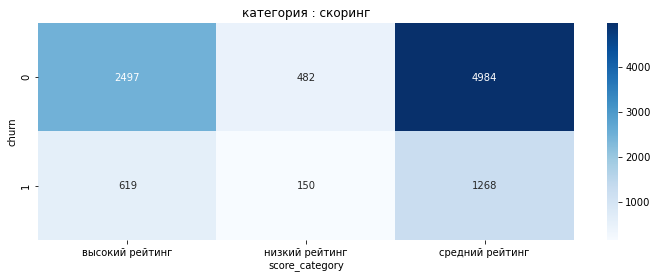

In [41]:

score = df.pivot_table(index='churn',columns='score_category',values='userid',aggfunc='count')
plt.figure(figsize=(12, 4))
sns.heatmap(score, cmap='Blues', annot=True, fmt='.0f')
plt.title('категория : скоринг')
plt.show()

In [42]:
churn_from_category(score)


% оттока от категории churn : 100.00%
% оттока от категории высокий рейтинг : 19.87%
% оттока от категории низкий рейтинг : 23.73%
% оттока от категории средний рейтинг : 20.28%


Видим, что в отток все категории уходят почти одинаково, только больше уходят те, у которых низкий рейтинг

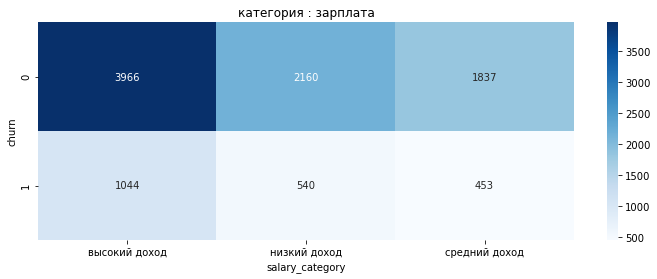

In [43]:

salary = df.pivot_table(index='churn',columns='salary_category',values='userid',aggfunc='count')
plt.figure(figsize=(12, 4))
sns.heatmap(salary, cmap='Blues', annot=True, fmt='.0f')
plt.title('категория : зарплата')
plt.show()

In [44]:
churn_from_category(salary)

% оттока от категории churn : 100.00%
% оттока от категории высокий доход : 20.84%
% оттока от категории низкий доход : 20.00%
% оттока от категории средний доход : 19.78%


Все одинаково

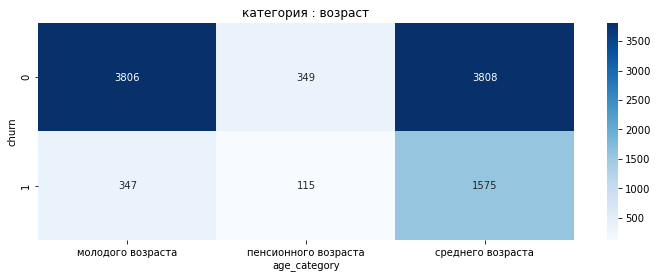

In [45]:
salary = df.pivot_table(index='churn',columns='age_category',values='userid',aggfunc='count')
plt.figure(figsize=(12, 4))
sns.heatmap(salary, cmap='Blues', annot=True, fmt='.0f')
plt.title('категория : возраст')
plt.show()

In [46]:
churn_from_category(salary)

% оттока от категории churn : 100.00%
% оттока от категории молодого возраста : 8.36%
% оттока от категории пенсионного возраста : 24.78%
% оттока от категории среднего возраста : 29.26%


Молодые менее всего склоны уходить, а вот людей среднего возраста больше всего в оттоке

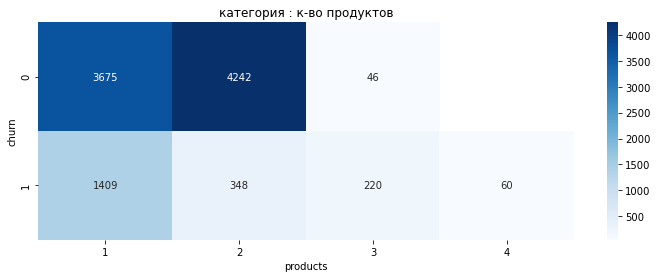

In [47]:
pro = df.pivot_table(index='churn',columns='products',values='userid',aggfunc='count')
plt.figure(figsize=(12, 4))
sns.heatmap(pro, cmap='Blues', annot=True, fmt='.0f')
plt.title('категория : к-во продуктов')
plt.show()

In [48]:
churn_from_category(pro)

% оттока от категории churn : 100.00%
% оттока от категории 1 : 27.71%
% оттока от категории 2 : 7.58%
% оттока от категории 3 : 82.71%
% оттока от категории 4 : 100.00%


А вот это уже интересно, видно большое количество продуктов не пользуется популярностью у наших клиентов, и даже получилось так, что все клиенты, у которых было 4 продукта, все они ушли в отток, также большой % оттока и у клиентов, которые используют 1 продукт. Идеальный вариант, когда у клиента 2 продукта, у такого сегмента низкий % оттока

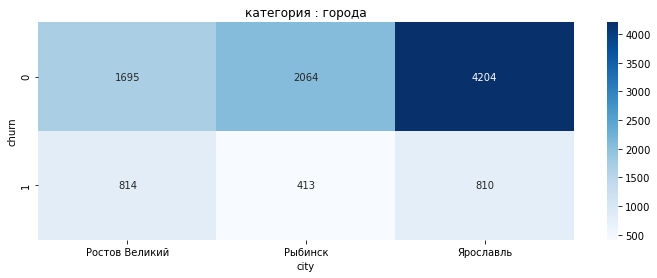

In [49]:
city = df.pivot_table(index='churn',columns='city',values='userid',aggfunc='count')
plt.figure(figsize=(12, 4))
sns.heatmap(city, cmap='Blues', annot=True, fmt='.0f')
plt.title('категория : города')
plt.show()

In [50]:
churn_from_category(city)

% оттока от категории churn : 100.00%
% оттока от категории Ростов Великий : 32.44%
% оттока от категории Рыбинск : 16.67%
% оттока от категории Ярославль : 16.15%


Высокий % оттока в Ростове Великом, почти 2 больше чем в других городах

### анализ матрицы корреляций

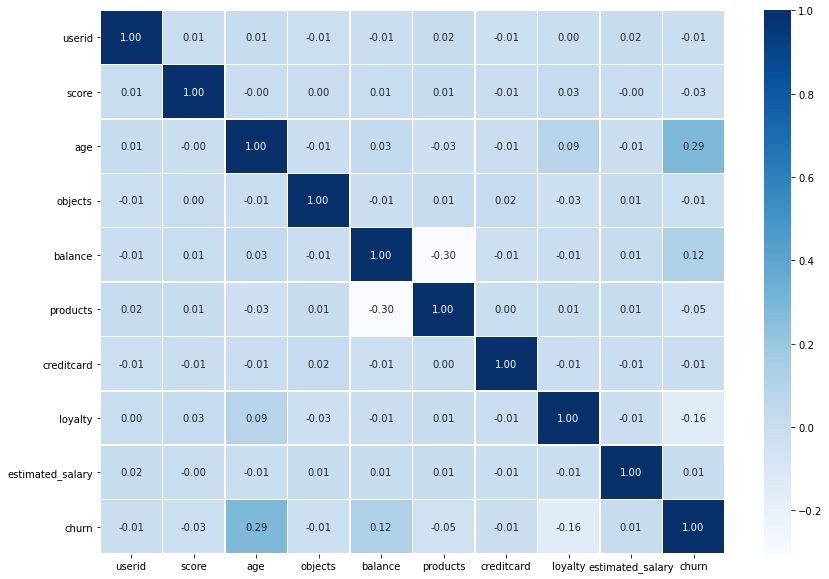

In [51]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr() , annot = True, fmt = '0.2f', linewidths=.5, cmap="Blues")
plt.show()

Видим, что признаки очень слабо коррелируют с оттоком, разве что раслуживает внимания возраст, нужно будет проверить гипотезу о различии возраста между теми клиентами, которые ушли и теми, которые остались


<a id="part4"></a>
## Выделение портрет клиентов, которые склонны уходить из банка

**Портрет клиента, сколонного уйти из банка :**


- он старше 35 лет (от 35 до 60 - 30% отток, а от 60 отток равен 25%), самые преданные - это люди до 35 лет, у них отток 8%

- он живет в Великом Ростове (% отока в этом городе в 2 раза больше чем в других - 32%)

- использующий 3-4 продуктов, также стоит отметить, что и те, которые используют 1 продукт, у них тоже не маленький % оттока - 28%, идеальный вариант - 2 продукта, такие клиенты меньше всех уходят

- неактивный 

- не имеет собствености (% оттока = 23%, хоть он и не сильно опережает другие категории, но все же он у него самый высокий)

- низкий кредитный скоринг (тоже не сильно превосходит другие категории)

- это женщина

**Портер клиента, не склонного уйти из банка:**

- ему до 35 лет
- живет в Рыбинске или Ярославле
- использует 2 продукта
- мужчина
- активный
- владеет более 5 объетков

<a id="part5"></a>
##  Проверка гипотез

 ### Проверка гипотезы о различии дохода между теми клиентами, которые ушли и теми, которые остались

Mann–Whitney U test лучше t-test поэтому будем использовать его

**H0:Доход тех, кто в оттоке РАВЕН доходу тех, кто сотался**

**H1:Доход тех, кто в оттоке НЕ РАВЕН доходу тех, кто сотался**

In [52]:
alpha = 0.05

results = st.mannwhitneyu(df[df['churn']==1]['estimated_salary'], df[df['churn']==0]['estimated_salary'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0, вывод о различии сделать нельзя")

p-значение:  0.11352575465076892
Не получилось отвергнуть H0, вывод о различии сделать нельзя


Как мы раньше видели, доходы чуток заличались, но это не статистически-значима разница

### Проверка гипотеза о различии возраста между теми клиентами, которые ушли и теми, которые остались

**H0:Возраст тех, кто в оттоке РАВЕН возрасту тех, кто сотался**

**H1:Возраст тех, кто в оттоке НЕ РАВЕН возрасту тех, кто сотался**

In [53]:
alpha = 0.05

results = st.mannwhitneyu(df[df['churn']==1]['age'], df[df['churn']==0]['age'])
pvalue = results.pvalue

print('p-значение: ', pvalue)

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0, вывод о различии сделать нельзя")

p-значение:  1.6052007159685838e-230
Отвергаем H0: разница статистически значима


In [54]:
df.pivot_table(index='churn', values='age', aggfunc=['median','mean'])

,median,mean
,age,age
churn,,
0,36,37.41
1,45,44.84


Как мы и раньше замечали, что в отток склонны уходить люди постарше, здесь мы точно удостоверились, что клиенты в оттоке старше клиентов, которые остались. И видим, что разница в возрасте около 8-9 лет

<a id="part6"></a>

## Выводы и рекомендации

В данной выборке 10 000 уникальных клиентов, живущих в 3 городах. Из них 80% лояльных и 20% ушедших в отток.

Большая часть клиентов банка является людьми с высоким уровнем дохода (более 100 000 руб.), среднего возраста (35-60 лет), клиенты имеют 5 и более объектов во владении, со средним уровнем кредитного скоринга, по полу выборка распределена равномерно.
По итогам исследования был выведен такой портрет клиентов склонных и не склонных к оттоку:

**Признаки клиентов, которые склонны уходить в отток:**

- они старше 35 лет (от 35 до 60 - 30% отток, а от 60 отток равен 25%), самые преданные - это люди до 35 лет, у них отток всего 8%

- они живут в Великом Ростове (% отока в этом городе в 2 раза больше чем в других - 32%)

- используют 3-4 продуктов, также стоит отметить, что и те, которые используют 1 продукт, у них тоже не маленький % оттока - 28%, идеальный вариант - 2 продукта, такие клиенты меньше всех уходят

- неактивные

- не имеют собствености (% оттока = 23%, хоть он и не сильно опережает другие категории, но все же он у него самый высокий)

- низкий кредитный скоринг (тоже не сильно превосходит другие категории)

- в отток чаще попадают женщины

**Признаки клиентов, которые не склонны уходить в отток:**

- в отток реже попадают мужчины
- у клиентов до 35 лет ( % оттока самый низкий - 8% )
- живутт в Рыбинске или Ярославле
- использует 2 продукта (% оттока у клиентов, которые используют 2 продукта невероятно низкий - 7,5%)
- активные
- владеют более 5 объетков ( он не сильно отличается от других категорий, но среди них он самый низкий - 19% )

Стоит обратить внимание на то, что использование более 2 продуктов - самый сильный признак у клиентов склонных к оттоку. Так же важен пол (женщины больше склонны к оттоку). Есть статистически значимая разница в возрасте у лояльных и склонных к оттоку клиентов, разница составляет около 9 лет (чем старше клиент, тем больше вероятность ухода в отток). Большинство клиентов склонных к оттоку проживает в городе Ростове Великом.

# Рекомендации

- Стоит обратиться в тех отдел, чтобы детальнее исследовать причину пропусков в столбце 'Balance'. Также стоит передать коллегам информацию по клиентам, у которых зарплата слишком маленькая, но при этом у них на балансе около 80 000 и во владении есть 5 объектов и у них средний кредитный скоринг.
- Наблюдается большой отток у клиентов, которые пользуются 3-4 продуктами (у тех, кто использует 4, он вообще равен 100%), видно у банка есть 2 основных продукта, которыми все пользуются, но стоит клиенту обратиться за дополнительными услугами, так он с вероятностью минимум в 80% уйдет, видно качество этих продуктов оставляет желать лучшего, или же это могут быть клиенты, которые изначально приходят за этими доп продуктами, и они его не удолетворяют, также возможен вариант, что в моб приложении банка неудобно одновременно следить за 3-4 продуктами. В любом случае, нужно детальней изучить эти продукты, посмотреть после оформления какого продукта клиенты уходят и улучшить их
- В Великом Ростове отток выше чем в других городах, стоит проверить и улучшить качество обслуживания клиентов в этом городе 
- Также в отток чаще попадают люди которым уже под 40 и больше, можно предложить категории кэшбэка, которые бы подходили этой категории клиентов. Можно также сделать какие-то специальные предложения для пенсионеров или клиентов с детьми. Также, если вдруг у банка есть свое мобильное приложение, то может сделать его более простым, чтобы клиентам, которые не привыкли работать с современными гаджетами, было проще его использовать или сделать при регистрации маленький туториал, чтобы клиентам было проще разобраться в нем